In [1]:
import warnings
warnings.filterwarnings("ignore")
import MS
import scanpy as sc


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


### load the dataset

In [2]:
import pysodb
sodb = pysodb.SODB()
adata_dict = sodb.load_dataset('Dataset12_MS_raw')
adata = list(adata_dict.values())[0]

download experiment[Dataset12] in dataset[Dataset12_MS_raw]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 641M/641M [00:52<00:00, 12.9MB/s]


load experiment[Dataset12] in dataset[Dataset12_MS_raw] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/ysodb/cache/Dataset12_MS_raw/Dataset12.h5ad


In [3]:
# this dataset has multiple slices, indicated by the "slice_id" obs

In [4]:
print('data size:',adata.shape)

data size: (280327, 254)


## MS

In [15]:
# initialize the MS_multi object
msm = MS.MS_multi(
    adata,
    batch_obs = 'slice_id'
)


# set the number of scales, default is 15
msm.prepare()

msm.set_MS_para(
    n_scales=20
)

# construct the context-aware representation
msm.run_representation_mp(
    200
    # the number of processings
)



default number of process is 200
total batch: 64, running batch mouse1_slice1
total batch: 64, running batch mouse1_slice10
total batch: 64, running batch mouse1_slice21
total batch: 64, running batch mouse1_slice31
total batch: 64, running batch mouse1_slice40
total batch: 64, running batch mouse1_slice50
total batch: 64, running batch mouse1_slice62
total batch: 64, running batch mouse1_slice71
total batch: 64, running batch mouse1_slice81
total batch: 64, running batch mouse1_slice91
total batch: 64, running batch mouse1_slice102
total batch: 64, running batch mouse1_slice112
total batch: 64, running batch mouse1_slice122
total batch: 64, running batch mouse1_slice131
total batch: 64, running batch mouse1_slice153
total batch: 64, running batch mouse1_slice162
total batch: 64, running batch mouse1_slice170
total batch: 64, running batch mouse1_slice180
total batch: 64, running batch mouse1_slice190
total batch: 64, running batch mouse1_slice200
total batch: 64, running batch mouse1_

In [16]:
msm.run_clustering_normal(
    -0.3
    # the clustering parameter
    # positive value for the number of clusters
    # negative value for the clustering resolution
)

IOStream.flush timed out
IOStream.flush timed out


## output results

In [17]:
# take the first 3 slice as examples

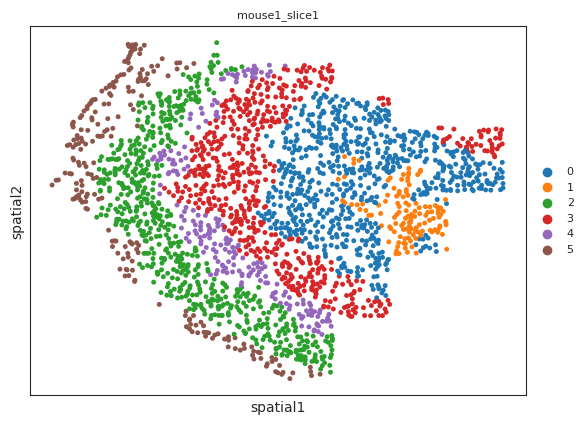

In [19]:
msm.output_cluster_single('MS_cluster_res0.3',idx=0)

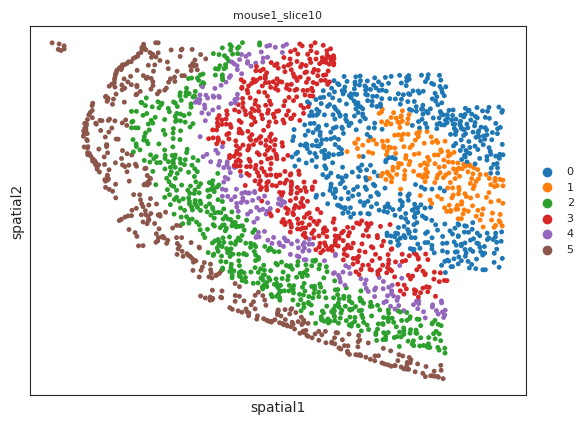

In [20]:
msm.output_cluster_single('MS_cluster_res0.3',idx=1)

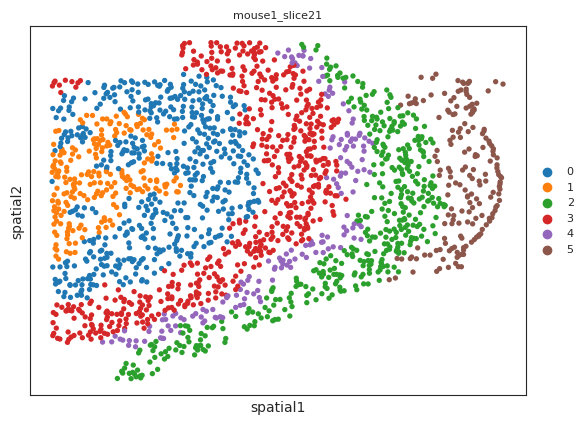

In [21]:
msm.output_cluster_single('MS_cluster_res0.3',idx=2)

## external application: Tissue Visualization via MS-View

In [34]:
msm.run_visualization_normal()

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


generating color coding...
1.0 0.0


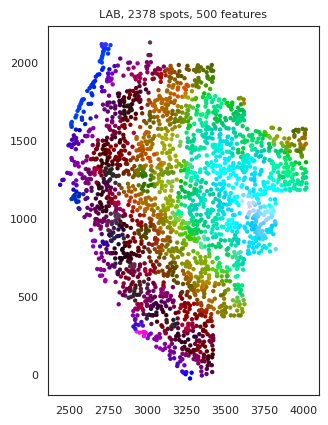

1.0 0.0


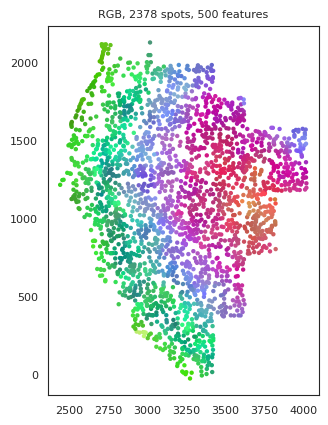

In [35]:
msm.output_visualization_single(
    dot_size=10,
    idx=0
    # control the size of cell
)

generating color coding...
1.0 0.0


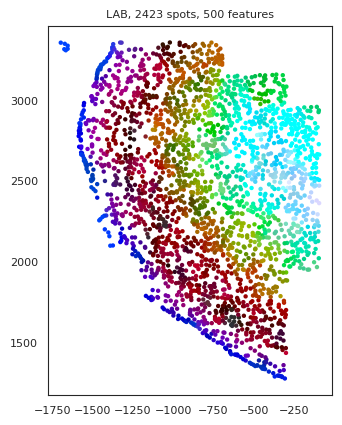

1.0 0.0


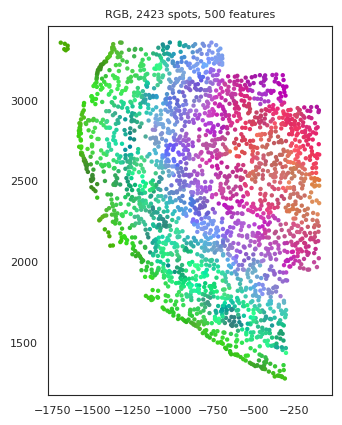

In [36]:
msm.output_visualization_single(
    dot_size=10,
    idx=1
    # control the size of cell
)

generating color coding...
1.0 0.0


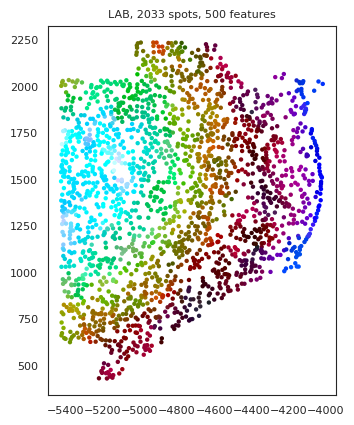

1.0 0.0


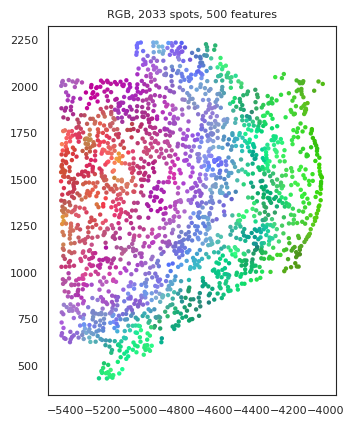

In [37]:
msm.output_visualization_single(
    dot_size=10,
    idx=2
    # control the size of cell
)

## save individual slice

In [38]:
import numpy as np
for si in np.unique(msm.adata_MS.obs['slice_id']):
    cur_a = msm.adata_MS[msm.adata_MS.obs['slice_id']==si]
    cur_a.write_h5ad(f'process/{data_use}_{si}.h5ad')

## save all slice

In [39]:
# save results
msm.adata_MS.write_h5ad(f'process/{data_use}.h5ad')